(1, 20) (1, 20)
Saved as: /scratch/gpfs/sbfisher/EM250x300/loss_data/loss_v_epoch_lr_0.0003_decaying_by_0.8.png


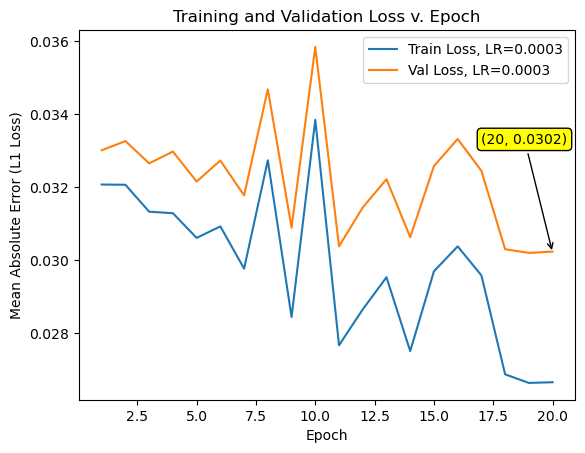

In [10]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os

loss_filename = "/scratch/gpfs/sbfisher/EM200/results/EM200CNNTrainingLoss.npy"
val_loss_filename = "/scratch/gpfs/sbfisher/EM200/results/EM200CNNValidationLoss.npy"

train_losses = np.load(loss_filename)
val_losses = np.load(val_loss_filename)
print(train_losses.shape, val_losses.shape)

SAVE_FIG_DIR = "/scratch/gpfs/sbfisher/EM250x300/loss_data/"
if not os.path.exists(SAVE_FIG_DIR):
    os.makedirs(SAVE_FIG_DIR)

lrs = [0.0003]
# lrs = [0.0005, 0.001, 0.005, 0.01, 0.03, 0.05]

epochs = 20
gamma = 0.8

for i, lr in enumerate(lrs):
    train_loss = train_losses[i]
    val_loss = val_losses[i]

    eps = [i for i in range(1, epochs+1)]
    plt.figure()
    plt.plot(eps, train_loss)
    plt.plot(eps, val_loss)
    last_x, last_y = eps[-1], round(val_loss[-1], 4)
    plt.annotate(f'({last_x}, {last_y})', xy=(last_x, last_y), xytext=(last_x - 3, last_y+0.003),
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='yellow'),
             # arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.5", color="black"))
             arrowprops=dict(arrowstyle="->", color="black"))

    plt.title("Training and Validation Loss v. Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Mean Absolute Error (L1 Loss)")
    plt.legend(["Train Loss, LR={}".format(lr), "Val Loss, LR={}".format(lr)])
    
    save_filename = SAVE_FIG_DIR + "loss_v_epoch_lr_{}_decaying_by_{}.png".format(lr, gamma)
    plt.savefig(save_filename, dpi=300)
    print("Saved as: " + save_filename)


# legend = []
# for lr in lrs:
#     legend.append("Train Loss, LR={}".format(lr))
#     legend.append("Val Loss, LR={}".format(lr))

# plt.legend(legend)